# Fourier Reconstruction of RR-Lyrae Templates

## Fig 10.1

In [1]:
"""
Fourier Reconstruction of RR-Lyrae Templates
--------------------------------------------
Figure 10.1

An example of a truncated Fourier representation of an RR Lyrae light curve.
The thick dashed line shows the true curve; the gray lines show the
approximation based on 1, 3, and 8 Fourier modes (sinusoids).
"""

'\nFourier Reconstruction of RR-Lyrae Templates\n--------------------------------------------\nFigure 10.1\n\nAn example of a truncated Fourier representation of an RR Lyrae light curve.\nThe thick dashed line shows the true curve; the gray lines show the\napproximation based on 1, 3, and 8 Fourier modes (sinusoids).\n'

In [2]:
import numpy as np
from matplotlib import pyplot as plt

from astroML.datasets import fetch_rrlyrae_templates


In [3]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [4]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [5]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)


In [6]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=18, usetex=True)

# Load the RR Lyrae template

In [7]:
#------------------------------------------------------------
# Load the RR Lyrae template
templates = fetch_rrlyrae_templates()
x, y = templates['115r'].T


In [9]:
x.shape

(500,)

In [10]:
y.shape

(500,)

Text(0, 0.5, 'x')

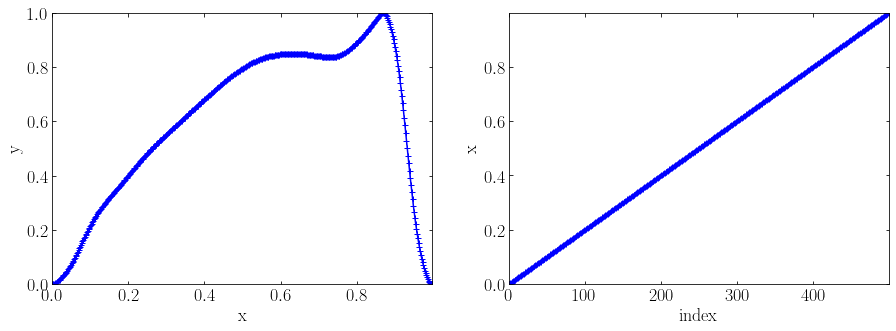

In [28]:
fig = plt.figure(figsize=(15, 5))
ax=fig.add_subplot(121)
ax.plot(x,y,'-b+')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax=fig.add_subplot(122)
ax.plot(x,'b+')
ax.set_xlabel("index")
ax.set_ylabel("x")
#ax1=ax.twiny()
#ax1.plot(x)

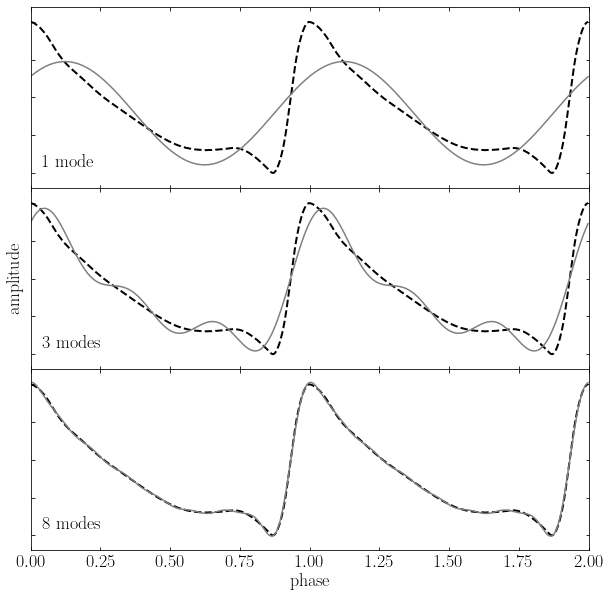

In [8]:
#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 10))
fig.subplots_adjust(hspace=0)

kvals = [1, 3, 8]
subplots = [311, 312, 313]

for (k, subplot) in zip(kvals, subplots):
    ax = fig.add_subplot(subplot)

    # Use FFT to fit a truncated Fourier series
    y_fft = np.fft.fft(y)
    y_fft[k + 1:-k] = 0
    y_fit = np.fft.ifft(y_fft).real

    # plot the true value and the k-term reconstruction
    ax.plot(np.concatenate([x, 1 + x]),
            np.concatenate([y, y]), '--k', lw=2)
    ax.plot(np.concatenate([x, 1 + x]),
            np.concatenate([y_fit, y_fit]), color='gray')

    label = "%i mode" % k
    if k > 1:
        label += 's'

    ax.text(0.02, 0.1, label, ha='left', va='bottom',
            transform=ax.transAxes)

    if subplot == subplots[-1]:
        ax.set_xlabel('phase')
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    if subplot == subplots[1]:
        ax.set_ylabel('amplitude')
    ax.yaxis.set_major_formatter(plt.NullFormatter())

    ax.set_xlim(0, 2)
    ax.set_ylim(1.1, -0.1)

plt.show()
